### Подключаем пакет

In [1]:
import numpy as np
import pandas as pd
from IPython.display import display

In [2]:
# DJI
url='https://finance.yahoo.com/quote/%5EDJI/components?p=%5EDJI'
# NASDAQ
url='https://finance.yahoo.com/quote/%5EIXIC/components?p=%5EIXIC'
# wiki DJI
url= 'https://en.wikipedia.org/wiki/Dow_Jones_Industrial_Average'
pd.read_html(url)[1]

,Company,Exchange,Symbol,Industry,Date added,Notes,Index weighting
0,3M Company,NYSE,MMM,Conglomerate,1976-08-09,As Minnesota Mining and Manufacturing,3.76%
1,American Express,NYSE,AXP,Financial services,1982-08-30,NaN,2.99%
2,Amgen,NASDAQ,AMGN,Pharmaceutical industry,2020-08-31,NaN,4.68%
3,Apple Inc.,NASDAQ,AAPL,Information technology,2015-03-19,NaN,2.44%
4,Boeing,NYSE,BA,Aerospace and defense,1987-03-12,NaN,5.00%
5,Caterpillar Inc.,NYSE,CAT,Construction and Mining,1991-05-06,NaN,4.50%
6,Chevron Corporation,NYSE,CVX,Petroleum industry,2008-02-19,Also 1930-07-18 to 1999-11-01,2.27%
7,Cisco Systems,NASDAQ,CSCO,Information technology,2009-06-08,NaN,0.98%
8,The Coca-Cola Company,NYSE,KO,Food industry,1987-03-12,Also 1932-05-26 to 1935-11-20,1.05%
9,Dow Inc.,NYSE,DOW,Chemical industry,2019-04-02,NaN,1.31%


## Диверсификация портфеля
### Загрузка данных

In [3]:
#Импортируем перечень бумаг 
import pandas as pd
url= 'https://en.wikipedia.org/wiki/Dow_Jones_Industrial_Average'

df = pd.read_html(url)[1]
df.head()


,Company,Exchange,Symbol,Industry,Date added,Notes,Index weighting
0,3M Company,NYSE,MMM,Conglomerate,1976-08-09,As Minnesota Mining and Manufacturing,3.76%
1,American Express,NYSE,AXP,Financial services,1982-08-30,NaN,2.99%
2,Amgen,NASDAQ,AMGN,Pharmaceutical industry,2020-08-31,NaN,4.68%
3,Apple Inc.,NASDAQ,AAPL,Information technology,2015-03-19,NaN,2.44%
4,Boeing,NYSE,BA,Aerospace and defense,1987-03-12,NaN,5.00%


In [4]:
#Выгружаем тикера и названия компаний
names=df[['Symbol','Company']]
symbol=names['Symbol'].values
full_name=names['Company'].values
print(symbol)
print(full_name)

['MMM' 'AXP' 'AMGN' 'AAPL' 'BA' 'CAT' 'CVX' 'CSCO' 'KO' 'DOW' 'GS' 'HD'
 'HON' 'IBM' 'INTC' 'JNJ' 'JPM' 'MCD' 'MRK' 'MSFT' 'NKE' 'PG' 'CRM' 'TRV'
 'UNH' 'VZ' 'V' 'WBA' 'WMT' 'DIS']
['3M Company' 'American Express' 'Amgen' 'Apple Inc.' 'Boeing'
 'Caterpillar Inc.' 'Chevron Corporation' 'Cisco Systems'
 'The Coca-Cola Company' 'Dow Inc.' 'Goldman Sachs' 'The Home Depot'
 'Honeywell' 'IBM' 'Intel' 'Johnson & Johnson' 'JPMorgan Chase'
 "McDonald's" 'Merck & Co.' 'Microsoft' 'Nike' 'Procter & Gamble'
 'Salesforce' 'The Travelers Companies' 'UnitedHealth Group' 'Verizon'
 'Visa Inc.' 'Walgreens Boots Alliance' 'Walmart'
 'The Walt Disney Company']


In [5]:
#грузим исторические данные на цену закрытия
# доп пакет pandas-datareader
# доп пакет requests-cache

import pandas_datareader.data as web
import datetime
import requests_cache

start = datetime.datetime(2020, 6, 1)
end = datetime.datetime(2021, 2, 28)

# data_exchange={}
# for s in symbol:
#       data_exchange[s] =  web.DataReader(s,'stooq', start, end)  
        
# data_exchange={}
# for s in symbol:
#       data_exchange[s] =  web.DataReader(s,'quandl', start, end)        
        
expire_after = datetime.timedelta(days=3)
session = requests_cache.CachedSession(cache_name='cache', backend='sqlite', expire_after=expire_after)
data_exchange={}
for s in symbol:
      data_exchange[s] =  web.DataReader(s, 'yahoo', start, end, session=session)      
    
    
# expire_after = datetime.timedelta(days=3)
# session = requests_cache.CachedSession(cache_name='cache', 
#                                        backend='sqlite', 
#                                        expire_after=expire_after)
# start = datetime.datetime(2018, 1, 1)
# end = datetime.datetime(2018, 4, 30)

# data_exchange={}

# n=25 # проблемный актив
# names=names.drop([25])
# symbol=np.delete(symbol,[25])
# full_name=np.delete(full_name,[25])

# for s in symbol_dow:
#     data_exchange[s]=  web.DataReader(s,'yahoo', start, end, session=session)    

data_exchange

{'MMM':                   High         Low        Open       Close     Volume  \
 Date                                                                    
 2020-06-01  157.550003  154.889999  155.949997  155.580002  2083400.0   
 2020-06-02  158.600006  156.630005  156.750000  157.639999  2333800.0   
 2020-06-03  161.660004  158.520004  159.350006  161.210007  3674300.0   
 2020-06-04  162.580002  159.179993  159.759995  162.550003  2880700.0   
 2020-06-05  168.350006  165.000000  165.000000  167.410004  4527200.0   
 ...                ...         ...         ...         ...        ...   
 2021-02-22  177.089996  175.009995  176.460007  176.119995  2271500.0   
 2021-02-23  177.539993  174.710007  177.539993  176.169998  2352300.0   
 2021-02-24  177.979996  173.759995  176.000000  177.630005  2742600.0   
 2021-02-25  180.750000  177.429993  177.520004  178.759995  2634300.0   
 2021-02-26  179.449997  174.610001  179.440002  175.059998  3363300.0   
 
              Adj Close  
 Da

In [6]:
data_exchange["MMM"]

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-06-01,157.550003,154.889999,155.949997,155.580002,2083400.0,151.605072
2020-06-02,158.600006,156.630005,156.750000,157.639999,2333800.0,153.612442
2020-06-03,161.660004,158.520004,159.350006,161.210007,3674300.0,157.091232
2020-06-04,162.580002,159.179993,159.759995,162.550003,2880700.0,158.396988
2020-06-05,168.350006,165.000000,165.000000,167.410004,4527200.0,163.132812
...,...,...,...,...,...,...
2021-02-22,177.089996,175.009995,176.460007,176.119995,2271500.0,176.119995
2021-02-23,177.539993,174.710007,177.539993,176.169998,2352300.0,176.169998
2021-02-24,177.979996,173.759995,176.000000,177.630005,2742600.0,177.630005


In [7]:
price = pd.DataFrame({ tic: data_exchange[tic]['Close'] for tic in symbol })
price.head()
# Вариант 2 (этой же команды)
# price = pd.DataFrame({ tic: data['Close'] for tic, data in data_exchange.items() })
# price.head()

,MMM,AXP,AMGN,AAPL,BA,CAT,CVX,CSCO,KO,DOW,...,NKE,PG,CRM,TRV,UNH,VZ,V,WBA,WMT,DIS
Date,,,,,,,,,,,,,,,,,,,,,
2020-06-01,155.580002,96.750000,226.910004,80.462502,151.389999,120.500000,92.790001,46.299999,46.990002,38.610001,...,99.540001,117.250000,176.360001,109.150002,305.929993,55.779999,194.350006,43.299999,123.959999,118.769997
2020-06-02,157.639999,99.070000,223.720001,80.834999,153.309998,123.320000,94.690002,46.889999,46.900002,40.599998,...,100.739998,118.059998,174.229996,111.000000,306.309998,56.400002,196.360001,43.549999,123.940002,118.750000
2020-06-03,161.210007,105.400002,221.000000,81.279999,173.160004,127.089996,97.180000,46.939999,47.900002,41.630001,...,104.110001,118.529999,174.990005,114.470001,305.350006,56.830002,196.869995,43.610001,123.470001,122.180000
2020-06-04,162.550003,106.540001,220.880005,80.580002,184.300003,128.960007,96.279999,46.860001,47.919998,42.709999,...,101.279999,116.050003,171.440002,118.000000,298.079987,57.220001,193.639999,44.200001,122.110001,123.690002
2020-06-05,167.410004,109.730003,225.669998,82.875000,205.429993,135.119995,100.809998,47.830002,49.090000,43.970001,...,102.709999,118.330002,173.880005,124.360001,311.850006,57.740002,199.610001,45.349998,121.559998,124.820000


In [8]:
price = price.dropna( thresh = 0.91*len(price.index) , axis='columns')
price

,MMM,AXP,AMGN,AAPL,BA,CAT,CVX,CSCO,KO,DOW,...,NKE,PG,CRM,TRV,UNH,VZ,V,WBA,WMT,DIS
Date,,,,,,,,,,,,,,,,,,,,,
2020-06-01,155.580002,96.750000,226.910004,80.462502,151.389999,120.500000,92.790001,46.299999,46.990002,38.610001,...,99.540001,117.250000,176.360001,109.150002,305.929993,55.779999,194.350006,43.299999,123.959999,118.769997
2020-06-02,157.639999,99.070000,223.720001,80.834999,153.309998,123.320000,94.690002,46.889999,46.900002,40.599998,...,100.739998,118.059998,174.229996,111.000000,306.309998,56.400002,196.360001,43.549999,123.940002,118.750000
2020-06-03,161.210007,105.400002,221.000000,81.279999,173.160004,127.089996,97.180000,46.939999,47.900002,41.630001,...,104.110001,118.529999,174.990005,114.470001,305.350006,56.830002,196.869995,43.610001,123.470001,122.180000
2020-06-04,162.550003,106.540001,220.880005,80.580002,184.300003,128.960007,96.279999,46.860001,47.919998,42.709999,...,101.279999,116.050003,171.440002,118.000000,298.079987,57.220001,193.639999,44.200001,122.110001,123.690002
2020-06-05,167.410004,109.730003,225.669998,82.875000,205.429993,135.119995,100.809998,47.830002,49.090000,43.970001,...,102.709999,118.330002,173.880005,124.360001,311.850006,57.740002,199.610001,45.349998,121.559998,124.820000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-02-22,176.119995,135.949997,231.470001,126.000000,212.880005,218.059998,98.389999,45.430000,50.630001,62.480000,...,136.669998,126.580002,240.949997,147.869995,327.640015,56.450001,208.320007,48.860001,137.690002,191.759995
2021-02-23,176.169998,136.940002,232.460007,125.860001,212.119995,220.179993,99.629997,45.509998,50.540001,62.119999,...,136.130005,127.519997,235.639999,149.330002,329.510010,57.029999,212.110001,48.410000,135.470001,197.089996
2021-02-24,177.630005,139.889999,229.990005,125.349998,229.339996,222.470001,103.309998,45.740002,50.709999,63.689999,...,135.649994,127.660004,240.470001,150.960007,332.209991,57.119999,219.429993,49.169998,133.210007,197.509995


In [9]:
result_corr = price.corr()
display(result_corr.head())
np.fill_diagonal(result_corr.values,0.)
result_corr.head()

,MMM,AXP,AMGN,AAPL,BA,CAT,CVX,CSCO,KO,DOW,...,NKE,PG,CRM,TRV,UNH,VZ,V,WBA,WMT,DIS
MMM,1.000000,0.837375,-0.289985,0.752716,0.654030,0.848070,0.217238,0.023329,0.736331,0.866709,...,0.825003,0.365773,0.493964,0.785495,0.696403,0.247821,0.677384,0.401219,0.688522,0.820199
AXP,0.837375,1.000000,-0.298422,0.654702,0.832331,0.896411,0.509486,0.274526,0.620086,0.915004,...,0.797961,0.119674,0.277462,0.903349,0.721225,0.127038,0.724605,0.636955,0.553480,0.920177
AMGN,-0.289985,-0.298422,1.000000,-0.000948,-0.334605,-0.250900,-0.112598,0.093815,-0.370379,-0.229035,...,-0.308763,-0.035095,0.013796,-0.305559,-0.228560,-0.130199,-0.071032,-0.005347,-0.127560,-0.224790
AAPL,0.752716,0.654702,-0.000948,1.000000,0.405596,0.809499,-0.069730,-0.141931,0.614634,0.806720,...,0.846282,0.627976,0.647281,0.662660,0.748853,0.282934,0.648608,0.255906,0.803838,0.785200
BA,0.654030,0.832331,-0.334605,0.405596,1.000000,0.630062,0.690006,0.522913,0.497919,0.669147,...,0.552627,-0.102679,-0.063643,0.798406,0.575606,0.079910,0.608500,0.612684,0.341125,0.753755


,MMM,AXP,AMGN,AAPL,BA,CAT,CVX,CSCO,KO,DOW,...,NKE,PG,CRM,TRV,UNH,VZ,V,WBA,WMT,DIS
MMM,0.000000,0.837375,-0.289985,0.752716,0.654030,0.848070,0.217238,0.023329,0.736331,0.866709,...,0.825003,0.365773,0.493964,0.785495,0.696403,0.247821,0.677384,0.401219,0.688522,0.820199
AXP,0.837375,0.000000,-0.298422,0.654702,0.832331,0.896411,0.509486,0.274526,0.620086,0.915004,...,0.797961,0.119674,0.277462,0.903349,0.721225,0.127038,0.724605,0.636955,0.553480,0.920177
AMGN,-0.289985,-0.298422,0.000000,-0.000948,-0.334605,-0.250900,-0.112598,0.093815,-0.370379,-0.229035,...,-0.308763,-0.035095,0.013796,-0.305559,-0.228560,-0.130199,-0.071032,-0.005347,-0.127560,-0.224790
AAPL,0.752716,0.654702,-0.000948,0.000000,0.405596,0.809499,-0.069730,-0.141931,0.614634,0.806720,...,0.846282,0.627976,0.647281,0.662660,0.748853,0.282934,0.648608,0.255906,0.803838,0.785200
BA,0.654030,0.832331,-0.334605,0.405596,0.000000,0.630062,0.690006,0.522913,0.497919,0.669147,...,0.552627,-0.102679,-0.063643,0.798406,0.575606,0.079910,0.608500,0.612684,0.341125,0.753755


In [20]:
result=(abs(result_corr)>=0.8).astype(int)
#result=(result_corr>=0.9).astype(int)
result.head()

,MMM,AXP,AMGN,AAPL,BA,CAT,CVX,CSCO,KO,DOW,...,NKE,PG,CRM,TRV,UNH,VZ,V,WBA,WMT,DIS
MMM,0,1,0,0,0,1,0,0,0,1,...,1,0,0,0,0,0,0,0,0,1
AXP,1,0,0,0,1,1,0,0,0,1,...,0,0,0,1,0,0,0,0,0,1
AMGN,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AAPL,0,0,0,0,0,1,0,0,0,1,...,1,0,0,0,0,0,0,0,1,0
BA,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
import matplotlib.pyplot as plt
import networkx as nx

In [22]:
mapping

{0: 'MMM',
 1: 'AXP',
 2: 'AMGN',
 3: 'AAPL',
 4: 'BA',
 5: 'CAT',
 6: 'CVX',
 7: 'CSCO',
 8: 'KO',
 9: 'DOW',
 10: 'GS',
 11: 'HD',
 12: 'HON',
 13: 'IBM',
 14: 'INTC',
 15: 'JNJ',
 16: 'JPM',
 17: 'MCD',
 18: 'MRK',
 19: 'MSFT',
 20: 'NKE',
 21: 'PG',
 22: 'CRM',
 23: 'TRV',
 24: 'UNH',
 25: 'VZ',
 26: 'V',
 27: 'WBA',
 28: 'WMT',
 29: 'DIS'}

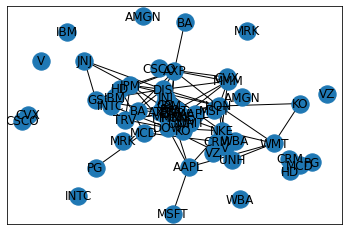

In [23]:
A=result.values
G=nx.from_numpy_matrix(A)
mapping=dict(zip(G.nodes(),result.index))

G1=nx.relabel_nodes(G,mapping)

nx.draw_networkx(G1)
nx.draw_networkx(G1,pos=nx.kamada_kawai_layout(G1))
plt.show()

In [26]:
clique=list(nx.find_cliques(G1))
print(clique)
max_clique=max(clique,key=len)
print()
print("максимальная ",max_clique)

[['DOW', 'UNH', 'NKE', 'HON'], ['DOW', 'CAT', 'AAPL', 'NKE'], ['DOW', 'CAT', 'DIS', 'AXP', 'JPM', 'TRV', 'GS'], ['DOW', 'CAT', 'DIS', 'AXP', 'JPM', 'TRV', 'HON'], ['DOW', 'CAT', 'DIS', 'AXP', 'MMM', 'HON'], ['DOW', 'CAT', 'DIS', 'NKE', 'HON', 'MMM'], ['KO', 'WMT', 'HON'], ['JNJ', 'GS', 'JPM', 'DIS'], ['IBM'], ['WMT', 'NKE', 'UNH', 'HON'], ['WMT', 'NKE', 'AAPL'], ['AMGN'], ['HD', 'MCD'], ['VZ'], ['V'], ['PG', 'MCD'], ['INTC'], ['MCD', 'CRM'], ['MSFT', 'AAPL'], ['MRK'], ['CVX', 'CSCO'], ['WBA'], ['BA', 'AXP']]

максимальная  ['DOW', 'CAT', 'DIS', 'AXP', 'JPM', 'TRV', 'GS']


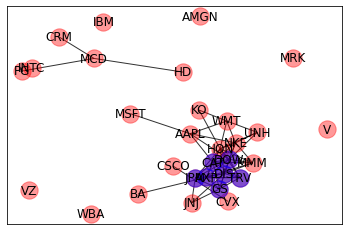

In [27]:
pos = nx.spring_layout(G1,dim=2,k=0.5)
nx.draw_networkx_nodes(G1,pos,node_color='r',alpha=0.4)
nx.draw_networkx_nodes(G1,pos,nodelist=max_clique,node_color='b',alpha=0.5)
nx.draw_networkx_edges(G1,pos,width=1.0,alpha=0.8)
nx.draw_networkx_labels(G1,pos)
plt.show()


In [28]:
# Имена бумаг в клике
max_clique_name=names.loc[names['Symbol'].isin(max_clique)]
display(max_clique_name)
# Только имена бумаг
print(max_clique_name['Company'].values)

,Symbol,Company
1,AXP,American Express
5,CAT,Caterpillar Inc.
9,DOW,Dow Inc.
10,GS,Goldman Sachs
16,JPM,JPMorgan Chase
23,TRV,The Travelers Companies
29,DIS,The Walt Disney Company


['American Express' 'Caterpillar Inc.' 'Dow Inc.' 'Goldman Sachs'
 'JPMorgan Chase' 'The Travelers Companies' 'The Walt Disney Company']


In [29]:
no_max_clique_name=names.loc[~names['Symbol'].isin(max_clique)]
no_max_clique_name

,Symbol,Company
0,MMM,3M Company
2,AMGN,Amgen
3,AAPL,Apple Inc.
4,BA,Boeing
6,CVX,Chevron Corporation
7,CSCO,Cisco Systems
8,KO,The Coca-Cola Company
11,HD,The Home Depot
12,HON,Honeywell
13,IBM,IBM


In [30]:
df=pd.DataFrame(price, columns=max_clique_name['Symbol'].values)
display(df.head(3))
display(df.shape)
display(df.describe())
df = df.pct_change(fill_method='ffill').fillna(0).cumsum()
display(df.head())

,AXP,CAT,DOW,GS,JPM,TRV,DIS
Date,,,,,,,
2020-06-01,96.750000,120.500000,38.610001,199.929993,98.599998,109.150002,118.769997
2020-06-02,99.070000,123.320000,40.599998,204.139999,98.930000,111.000000,118.750000
2020-06-03,105.400002,127.089996,41.630001,210.570007,104.269997,114.470001,122.180000


(188, 7)

,AXP,CAT,DOW,GS,JPM,TRV,DIS
count,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000
mean,108.452234,160.175319,49.397660,229.035532,111.209574,125.312819,141.546010
std,12.234519,25.267594,6.218593,38.149667,16.519530,12.713640,25.111254
min,90.570000,120.500000,38.450001,186.119995,91.279999,107.440002,109.099998
25%,97.502502,138.277500,43.992500,201.837505,98.500002,114.360001,122.412498
50%,104.560001,155.945000,48.650000,210.094994,102.360001,120.169998,130.610001
75%,118.985003,179.342495,54.662499,244.407494,122.115000,136.537498,170.509998
max,139.889999,222.470001,63.689999,330.640015,153.259995,150.960007,197.509995


,AXP,CAT,DOW,GS,JPM,TRV,DIS
Date,,,,,,,
2020-06-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2020-06-02,0.023979,0.023402,0.051541,0.021057,0.003347,0.016949,-0.000168
2020-06-03,0.087874,0.053973,0.076911,0.052555,0.057324,0.048210,0.028716
2020-06-04,0.098689,0.068687,0.102853,0.072739,0.078136,0.079048,0.041075
2020-06-05,0.128631,0.116454,0.132355,0.087169,0.123138,0.132946,0.050210


<Figure size 432x288 with 0 Axes>

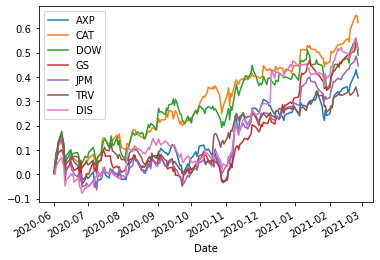

In [31]:
plt.figure();
df.plot();
plt.show();